## Praca domowa 4

#### Autor: Paweł Gelar

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

## a)

In [9]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


## b)

In [10]:
df.loc[df.Year == 2010].groupby("Genre").Global_Sales.agg("sum").nlargest(1)

Genre
Action    117.64
Name: Global_Sales, dtype: float64

## c)

In [11]:
df1 = df.groupby("Genre").agg({"EU_Sales" : "mean", "JP_Sales" : "mean"}).reset_index()
df1.loc[df1.EU_Sales < df1.JP_Sales].sort_values(by = 'JP_Sales').iloc[:, [0,2]].rename(columns = {"Genre":"Typ gry", "JP_Sales":"Średnia sprzedaż w Japonii"}).reset_index(drop=True)

,Typ gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

# Zdecydowałem się poprawić wykres Jędrzeja Sokołowskiego. 
## 1. Oryginalny wykres (widoczny poniżej) znajdował się w "Wiadomościach" TVP z dnia 23.10.2021

![wykres_pierwotny.png](wykres_pierwotny.png)

## 2. Poprawiony wykres wygląda następująco:

![wykres_d0_poprawy.png](wykres_do_poprawy.png)

źródło:https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SokolowskiJedrzej/HW2_raport_Sokolowski.pdf
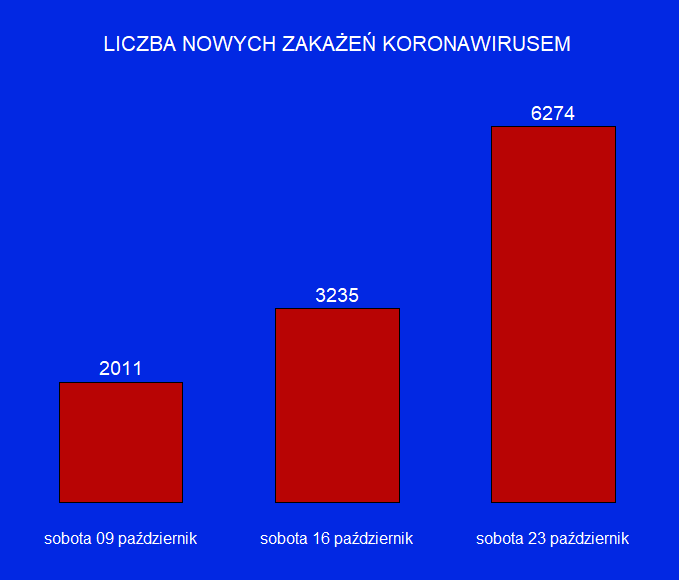

## 3.

Text(0.5, 1.0, 'Liczba nowych zakażeń koronawirusem')

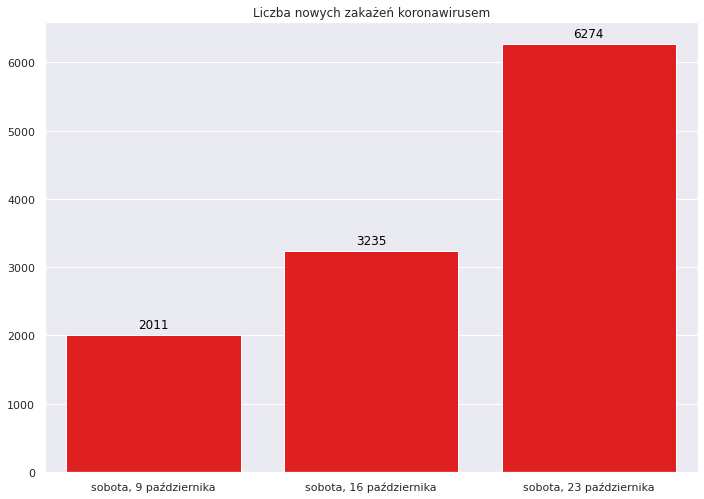

In [16]:
df = pd.DataFrame(data= {"daty" : ["sobota, 9 października", "sobota, 16 października", "sobota, 23 października"], "liczba" : [2011, 3235, 6274]})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(data = df, x = "daty", y = "liczba", color = "red") 
plot.set(xlabel= None, ylabel = None)
for i, numer in enumerate(df.liczba):
    plot.text(i, numer + 100, numer, color='black', horizontalalignment = "center")
plt.title(label= "Liczba nowych zakażeń koronawirusem")

## 4. Uzasadniene
Uważam, że mój wykres jest lepszy od pierwotnego, bo nie zawiera słupków 3d utrudniających odczyt danych.

Jest także lepszy od wykresu z pracy domowej 2, bo schemat kolorystyczny jest przyjemniejszy dla oka i nie zawiera błędu w datach (np. sobota 23 październik, zamiast 23 października)